# This is an even easier demo

This demo is designed only just for showing how to use the pretrained model, nothing else.

In [1]:
import torch 
import torchvision
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(( 224,224)),
    transforms.ToTensor()
]
)          

class CarMakeModelClassifier(torch.nn.Module):
    def __init__(self, device):
        super(CarMakeModelClassifier, self).__init__()
        self.device = device
        self.make_classifier = torchvision.models.resnet34(pretrained=False, progress=True)
        self.make_classifier.fc = torch.nn.Linear(in_features = 512, out_features = 163)
        self.model_classifier = torchvision.models.resnet50(pretrained=False, progress=True)
        self.model_classifier.fc = torch.nn.Linear(in_features = 2048, out_features = 2004)
        self.make_classifier = self.make_classifier.to(device)
        self.model_classifier = self.model_classifier.to(device)
    def forward(self, x):
        make = self.make_classifier(x.to(self.device))
        model = self.model_classifier(x.to(self.device))
        return {'make':make, 'model':model}

device = torch.device('cpu')
classifier = CarMakeModelClassifier(device)

optimizer_model = torch.optim.Adam(classifier.model_classifier.parameters())
optimizer_make = torch.optim.Adam(classifier.make_classifier.parameters())
criterion = torch.nn.CrossEntropyLoss()


checkpoint = torch.load('checkpoint4/10_epoch.tar')
classifier.make_classifier.load_state_dict(checkpoint['make_model_state_dict'])
optimizer_make.load_state_dict(checkpoint['make_optimizer_state_dict'])
classifier.model_classifier.load_state_dict(checkpoint['model_model_state_dict'])
optimizer_model.load_state_dict(checkpoint['model_optimizer_state_dict'])

In [2]:
import scipy.io as skio
mapping_model = skio.loadmat('../Dataset/data/misc/make_model_name.mat')['model_names'][:, 0]
mapping_make = skio.loadmat('../Dataset/data/misc/make_model_name.mat')['make_names'][:, 0]

import matplotlib.pyplot as plt
from PIL import Image
def visualize_perf(imagefile, classifier,transform):
    classifier.eval()
    image = Image.open(imagefile)
    plt.imshow(image)
    plt.show()
    image_tensor = transform(image).unsqueeze_(0).to(device)
#     print(model)
    output = classifier(image_tensor)
#     print(type(output))
    output_make = output['make']
    output_model = output['model']
    _, predicted_make = output_make.max(1)
    _, predicted_model = output_model.max(1)
    print('Predicted Make '+str(mapping_make[predicted_make.item()-1]))
    print('Predicted Model '+str(mapping_model[predicted_model.item()-1]))
    

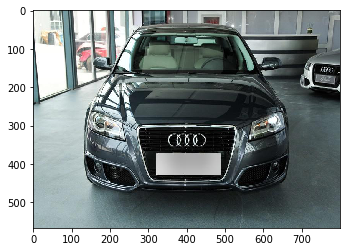

Predicted Make ['Audi']
Predicted Model ['ABT A3']


In [3]:
visualize_perf('/home/billy/Documents/CompCarDemo/Dataset/data/image/1/1101/2011/07b90decb92ba6.jpg', classifier, transform)